In [163]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [164]:
# Loading CSV:

def loadCSV(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=0, unpack=False)
    x_first_feature = data[:,0] # First row! Need to get this on a matrix-form!
    x_second_feature = data[:,1]
    X = data[:,range(data.shape[1]-1)] # Kolonne 1 og 2 kommer ut for 2D
    numOfColumns = data.shape[1]
    Y = data[:,data.shape[1]-1]
    ones = np.ones(X.shape[0])
    X = np.c_[ones,X] # Merge two matrices
    return data, X, Y, x_first_feature, x_second_feature

dataTrain, XTrain, YTrain, x_first_feature_train,x_second_feature_train = loadCSV('cl_train_1.csv')
dataTest, XTest, YTest, x_first_feature_test,x_second_feature_test = loadCSV('cl_test_1.csv')


In [165]:
# Logistic Regression with Gradient descent. Defining functions:
# z = h(x)
def linearSignal(w, x):
    return (w.T).dot(x)

# Sigma, the sigmoid function. Returns a number between 0 and 1. 
def logistic(z):
    return ( 1 / (1 + math.exp(-z)))
    
# Returns a probability that the datapoint (1,x1,x2) is in y.
def prob(w,x,y):
    z = linearSignal(w,x)
    probability = (logistic(z)**y)*(1 - logistic(z))**(1-y)
    return probability

# Calculating the cross-entropy error on the training and the test-set:
def CEE(X,Y,trainedWeights):
    error = 0
    place = 0
    for y in Y:
        z = linearSignal(trainedWeights,X[place])
        sigmaZ = logistic(z)
        error = error + (y* (np.log(sigmaZ)) + (1 - y)*np.log(1-sigmaZ))
        place += 1
    return -error/((Y.shape[0]))

In [166]:
# Calculation the weights with Gradient descent:

def gradientDescent(X,Y,LR,weights,iterations,Xtest,Ytest):
    it = 0
    error_arrayTrain = np.ones(iterations)
    error_arrayTest = np.ones(iterations)
    placeInErrorArray = 0
    while it < iterations:
        place = 0
        summ = 0
        
        
        for x in X:
            summ = summ + np.dot((logistic(linearSignal(weights,x)) - Y[place]),x)
            place+=1
            
        # Calculating the error with CEE for each iteration:
        error_Train = CEE(X, Y, weights)
        error_Test = CEE(Xtest, Ytest, weights)

        
        # Adding it to the error_array:
        error_arrayTrain[placeInErrorArray] = error_Train
        error_arrayTest[placeInErrorArray] = error_Test
        
        # Calc the weights for every iteration:
        weights = weights - (LR*summ)
        it+=1
        placeInErrorArray += 1
        
    return weights, error_arrayTrain, error_arrayTest


In [167]:
## Using the functions to calculate values:

# Setting the initial weights in the range -0.5 to 0.5:
initWeights = np.array([0.5, 0.5,0.5])


trained_Weights, error_arrayTrain,error_arrayTest  = gradientDescent(XTrain,YTrain, 0.2,initWeights, 1000, XTest,YTest)

error_After_Iteration = CEE(XTrain, YTrain, trained_Weights)
print("Training-error_After_Iteration: ", error_After_Iteration)

Training-error_After_Iteration:  0.014713762602761296


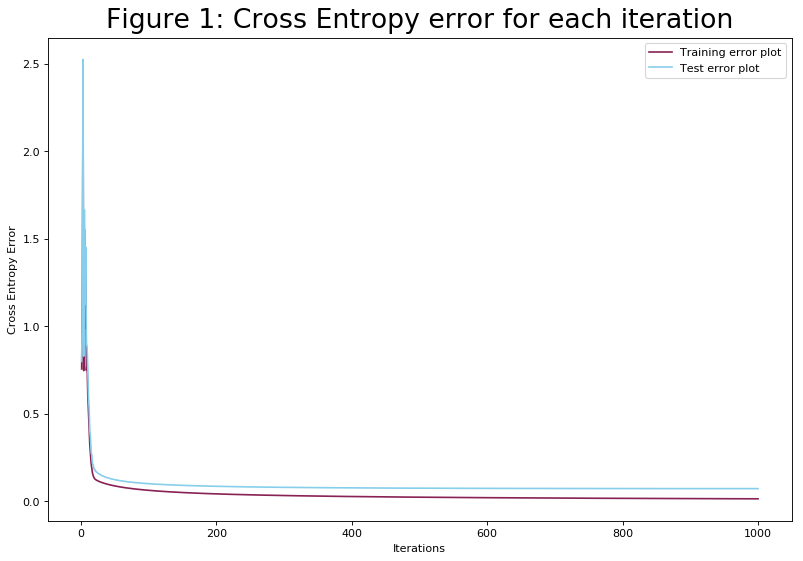

In [168]:
# Plotting the iteration error for the training data: 
xVals = (list(range(1001)))
xVals.pop(0)
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
font = {
        'weight' : 'bold',
        'size'   : 12}
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Error')
plt.title('Figure 1: Cross Entropy error for each iteration', size = 24)
plt.plot(xVals, error_arrayTrain, color = "#882255", label = 'Training error plot')
plt.plot(xVals, error_arrayTest,label = 'Test error plot', color = 'skyblue')
plt.legend()
plt.show()

In [169]:
## Classification of the data:
# Prediction after training:
# if w.T.dot(x) >= 0: place the point in 1-array.
# print(trained_Weights)
print(" ")

print(x_first_feature_train.shape)
# print(" ")
print(x_second_feature_train.shape)


def classifyDataPoint(inputX,inputY,weights):
    arrayClass_1_x1 = np.array([])
    arrayClass_1_x2 = np.array([])
    arrayClass_2_x1 = np.array([])
    arrayClass_2_x2 = np.array([])

    # Need to loop through the points 
    for x in inputX:
        z = linearSignal(weights,x)
        if z >= 0:
            # place the point in an array of the ones class.
            arrayClass_1_x1 = np.append(arrayClass_1_x1,[x[1]],axis=0)
            arrayClass_1_x2 = np.append(arrayClass_1_x2,[x[2]],axis=0)

        else:
            arrayClass_2_x1 = np.append(arrayClass_2_x1,[x[1]],axis=0)
            arrayClass_2_x2 = np.append(arrayClass_2_x2,[x[2]],axis=0)
    return arrayClass_1_x1, arrayClass_1_x2, arrayClass_2_x1, arrayClass_2_x2

class_1_x1, class_1_x2, class_2_x1, class_2_x2 = classifyDataPoint(XTrain, YTrain, trained_Weights)
print(" ")
print("class_1_x1 ", class_1_x1)
print(" ")
print("class_1_x2", class_1_x2)

 
(60,)
(60,)
 
class_1_x1  [0.199 0.39  0.223 0.277 0.075 0.805 0.457 0.732 0.245 0.424 0.429 0.412
 0.592 0.206 0.587 0.    0.304 0.069 0.253 0.498 0.348 0.211 0.368 0.218
 0.611 0.204 0.262 0.242 0.383 0.31  0.121 0.316 0.69  0.149 0.023]
 
class_1_x2 [0.11  0.836 0.92  0.652 0.501 0.976 0.653 0.877 0.263 0.753 0.515 0.803
 0.874 0.69  0.767 0.77  0.908 0.389 0.657 0.558 0.259 0.111 0.13  0.71
 0.824 0.232 0.666 1.    0.208 0.964 0.181 0.192 0.901 0.781 0.817]


[ 12.20510561   8.40083193   4.59655825   0.79228458  -3.0119891
  -6.81626278 -10.62053646 -14.42481014 -18.22908382 -22.0333575 ]


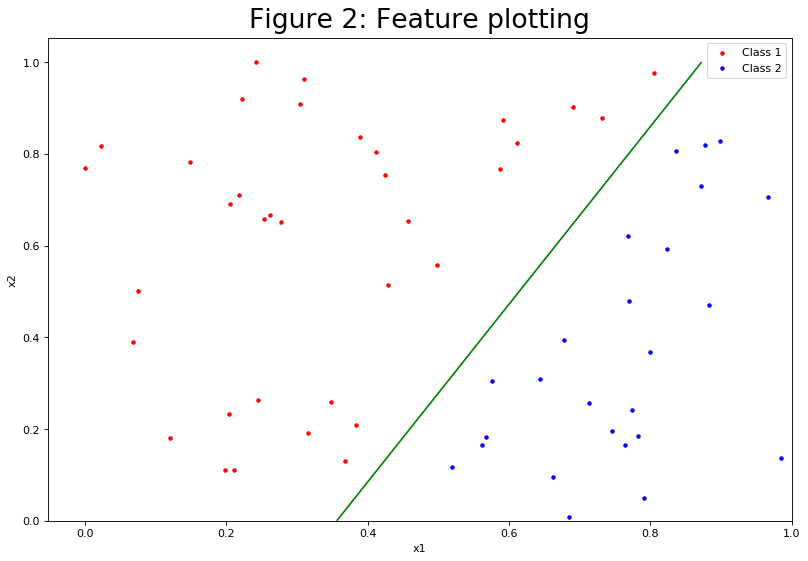

In [215]:
# Plotting the data:
# Plotting the iteration error for the training data: 
# numpy.linspace & numpy.meshgrid with matplotlib.pyplot.contour

def plotFeaturesAndModel(Xinput, weights):
    fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
    font = {
            'weight' : 'bold',
            'size'   : 12}

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Figure 2: Feature plotting', size = 24)
    plt.scatter(class_1_x1, class_1_x2, marker='.',color='r', label = "Class 1")
    plt.scatter(class_2_x1, class_2_x2, marker='.',color='b', label = "Class 2")

    # Plotting the model z = h(x,w) as well:
    x_axis = np.linspace(0,1,1000)
    y_axis = np.linspace(0,1,1000)

    xx, yy = np.meshgrid(x_axis,y_axis)
    z = weights[0] + weights[1]*xx + weights[2]*yy 
    
    plt.contour(xx, yy, z, levels=1, colors='green')
    # print(x_values_model)
    # Get the y-values from the model:
    
    def f(x,w):
     return (w[0] + w[1]*x)

    modelPoints = f(x_values_model,trained_Weights) # was xarray
    print(modelPoints)
    # Plotting the model points:
    #ax = fig.add_subplot(111)
    # x,y = np.meshgrid(x_values_model,x_values_model)
    # plt.plot(x,y)
    
    plt.legend()
    plt.show()
plotFeaturesAndModel(XTrain, trained_Weights)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


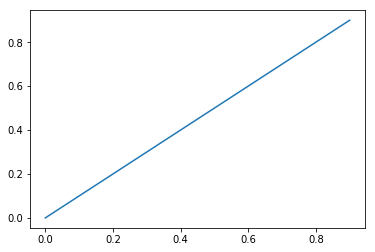

In [152]:
x = np.arange(0, 1, 0.1)
y = np.arange(0, 1, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.plot(x,y)